# Проект "Обучение с учителем: качество модели"

__Описание проекта__

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

__Как решать задачу__

Подход к решению задачи:
- Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: 
 - «снизилась», если клиент стал покупать меньше товаров, и 
  - «прежний уровень».
- Собрать данные по клиентам по следующим группам:
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

1. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. Включить в исследование  дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

__Описание данных__

Данные из файла __market_file.csv__.

Файл в табличной форме содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- __id__ — номер покупателя в корпоративной базе данных.
- __Покупательская активность__ — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- __Тип сервиса__ — уровень сервиса, например «премиум» и «стандарт».
- __Разрешить сообщать__ — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- __Маркет_ актив_ 6_мес__ — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- __Маркет_актив_тек_мес__ — количество маркетинговых коммуникаций в текущем месяце.
- __Длительность — значение__, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- __Акционные_покупки__ — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- __Популярная_категория__ — самая популярная категория товаров у покупателя за последние 6 месяцев.
- __Средний_просмотр_категорий_за_визит__ — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- __Неоплаченные_продукты_штук_квартал__ — общее число неоплаченных товаров в корзине за последние 3 месяца.
- __Ошибка_сервиса__ — число сбоев, которые коснулись покупателя во время посещения сайта.
- __Страниц_за_визит__ — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


Данные из файла __market_money.csv__.

В таблице данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- __id__ — номер покупателя в корпоративной базе данных.
- __Период__ — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- __Выручка__ — сумма выручки за период.

Данные из файла __market_time.csv__.

В табличном виде ссобраны данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- __id__ — номер покупателя в корпоративной базе данных.
- __Период__ — название периода, во время которого зафиксировано общее время.
- __минут__ — значение времени, проведённого на сайте, в минутах.


Данные из файла __money.csv__.

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- __id__ — номер покупателя в корпоративной базе данных.
- __Прибыль__ — значение прибыли.

### Загрузка данных

1.1 Загрузим данные. 

Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны через следующие пути:
- /datasets/market_file.csv
- /datasets/market_money.csv
- /datasets/market_time.csv
- /datasets/money.csv

In [114]:
!pip install scikit-learn==1.1.3 -q

In [115]:
!pip install shap -q

In [116]:
# Импорт библиотек
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import re
#import phik
import shap

from scipy import stats as st
from matplotlib import rcParams 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
#from phik import phik_matrix
#from phik.report import plot_correlation_matrix

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
    )
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


RANDOM_STATE = 42
TEST_SIZE = 0.25

# Размер шрифта для заголовка графиков
rcParams['axes.titlesize'] = 14
# Толщина линии по умолчанию
rcParams['lines.linewidth'] = 0.5
# Параметры для гистограммы
# Принудительное использование цвета края
rcParams['patch.force_edgecolor'] = True
rcParams['patch.edgecolor'] = 'white'
# Размер шрифта подписи оси X
rcParams['xtick.labelsize'] = 10 # Размер шрифта подписи оси Y rcParams['ytick.labelsize'] = 10

Загрузим данные из файла market_file.csv и на их основе создадим датафрейм market_file.

In [117]:
market_file = pd.read_csv('/datasets/market_file.csv', sep = ',', decimal = '.')
market_file.head(4)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4


Данные загрузились корректно, приведем к нижнему регистру названия столбцов для удобства.

In [118]:
market_file.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_file.columns]
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская активность            1300 non-null   object 
 2   тип сервиса                          1300 non-null   object 
 3   разрешить сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Во всех столбцах типы данных корректны.

Загрузим данные из файла market_money.csv и на их основе создадим датафрейм market_money.

In [119]:
market_money = pd.read_csv('/datasets/market_money.csv', sep = ',', decimal = '.')
market_money.head(4)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4472.00


Данные загрузились корректно, приведем к нижнему регистру названия столбцов для удобства.

In [ ]:
market_money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_money.columns]
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Во всех столбцах типы данных корректны.

Загрузим данные из файла market_time.csv и на их основе создадим датафрейм market_time

In [121]:
market_time = pd.read_csv('/datasets/market_time.csv', sep = ',', decimal = '.')
market_time.head(4)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12


Данные загрузились корректно, приведем к нижнему регистру названия столбцов для удобства.

In [122]:
market_time.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in market_time.columns]
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Во всех столбцах типы данных корректны.

Загрузим данные из файла _money.csv_ и на их основе создадим датафрейм __money__.

In [123]:
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
money.head(4)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87


Данные загрузились корректно, приведем к нижнему регистру названия столбцов для удобства.

In [124]:
money.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in money.columns]
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Во всех столбцах типы данных корректны.

Вывод:

Данные в таблицах соответствуют описанию, загруженны корректно и имеют соотвествующий тип, можно перейти к  предобработке.

### Предобработка данных

Проверим все данные на наличие пропусков и дубликатов. При необходимости устраним все проблемы.

Проведем предобработку данных датафрейма __market_file__.

In [125]:
# Проверим дубликаты и выведем их сумму
market_file.duplicated().sum()

0

Явных дубликатов нет.

In [126]:
# Проверка количества пропусков
market_file.isna().sum()

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

Пропусков нет.

Проверим на не явные дубликаты столбцы _покупательская активность, тип сервиса, разрешить сообщать_.

In [127]:
# Проверка на неявные дубликаты столбца покупательская активность
market_file['покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

В столбце неявных дубликатов нет.

In [128]:
# Проверка на неявные дубликаты столбца тип сервиса
market_file['тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

В столбце есть неявные дубликаты, устаним их.

In [129]:
# Корректировка написания породы тип сервиса
market_file = market_file.replace('стандартт', 'стандарт')
market_file['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

В столбце неявных дубликатов больше нет.

In [130]:
# Проверка на неявные дубликаты столбца разрешить сообщать
market_file['разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

В столбце неявных дубликатов нет.

In [131]:
# Проверка на неявные дубликаты столбца популярная_категория
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В столбце неявных дубликатов нет.

Предобработка датафрейма market_file завершена.

Итоги:
- явные дубликаты отсуствовали;
- пропусков не было;
- устранены неявные дубликаты, где было необходимо.

Проведем предобработку данных датафрейма __market_money__.

In [132]:
# Проверим дубликаты и выведем их сумму
market_money.duplicated().sum()

0

Явных дубликатов нет.

In [133]:
# Проверка количества пропусков
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

Пропусков нет.

In [134]:
# Проверка на неявные дубликаты столбца период
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

В столбце неявных дубликатов нет.

Предобработка датафрейма market_money завершена.

Итоги:
- явные дубликаты отсуствовали;
- пропусков не было;
- неявные дубликаты отсуствовали.

Проведем предобработку данных датафрейма __market_time__.

In [135]:
# Проверим дубликаты и выведем их сумму
market_time.duplicated().sum()

0

Явных дубликатов нет.

In [136]:
# Проверка количества пропусков
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

Пропусков нет.

In [137]:
# Проверка на неявные дубликаты столбца период
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [138]:
# Корректировка написания
market_time = market_time.replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Неявных дубликатов нет.

Предобработка датафрейма market_time завершена.

Итоги:
- явные дубликаты отсуствовали;
- пропусков не было;
- неявные дубликаты отсуствовали.

Проведем предобработку данных датафрейма __money__.

In [139]:
# Проверим дубликаты и выведем их сумму
money.duplicated().sum()

0

Явных дубликатов нет.

In [140]:
# Проверка количества пропусков
money.isna().sum()

id         0
прибыль    0
dtype: int64

Пропусков нет.

Предобработка датафрейма money завершена.

Итоги:
- явные дубликаты отсуствовали;
- пропусков не было.

### Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

3.1 Статистический анализ количественных признаков. 

Построим гистограммы и проверим выбросы.

Посмотрим описательные характеристики датафрейма market_file.

In [141]:
# Посмотрим описательные характеристики датафрейма market_file
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,215997.50,4.25,4.01,601.90,0.32,3.27,2.84,4.19,8.18
std,375.42,1.01,0.70,249.86,0.25,1.36,1.97,1.96,3.98
min,215348.00,0.90,3.00,110.00,0.00,1.00,0.00,0.00,1.00
25%,215672.75,3.70,4.00,405.50,0.17,2.00,1.00,3.00,5.00
50%,215997.50,4.20,4.00,606.00,0.24,3.00,3.00,4.00,8.00
75%,216322.25,4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,216647.00,6.60,5.00,1079.00,0.99,6.00,10.00,9.00,20.00


3.1.1 Рассмотрим столбец __маркет актив 6 мес__ в двух группах. 

Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента

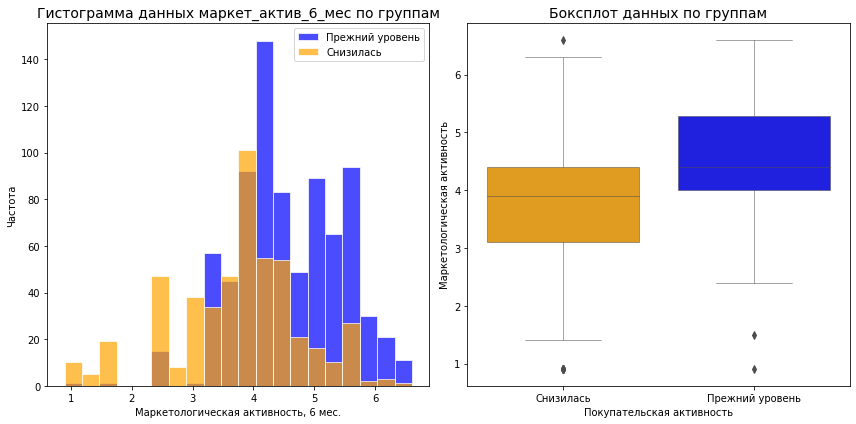

In [142]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['маркет_актив_6_мес']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['маркет_актив_6_мес']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Маркетологическая активность, 6 мес.')
plt.ylabel('Частота')
plt.title('Гистограмма данных маркет_актив_6_мес по группам')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='маркет_актив_6_мес', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Маркетологическая активность')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограммы столбца __маркет_актив_6_мес__.Данные распределены симметрично. Выбросы в столбце есть. Поскольку это реалистичные данные оставим всё как есть. Отметим, что при росте числа взаимодействий до 4, происходит снижение покупательской активности, затем довольно резкий рост активности.

3.1.2 Рассмотрим столбец  __длительность__.

Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

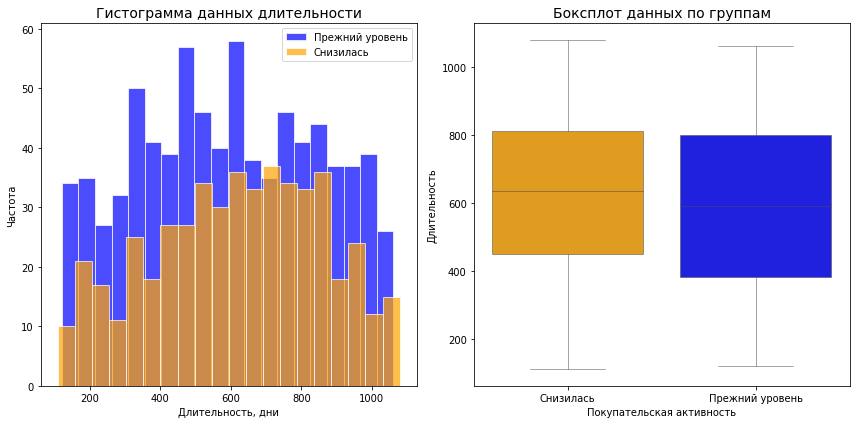

In [143]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['длительность']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['длительность']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Длительность, дни')
plt.ylabel('Частота')
plt.title('Гистограмма данных длительности')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='длительность', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Длительность')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограммы столбца __длительность__.Данные распределены симметрично. Выбросов нет. Максимальное число клиентов со сниженной активностью зарегестрированы примерно 700 дней. У группы с прежним уровнем максимум достигается раньше, примерно к 600 дню.

3.1.3 Рассмотрим столбец __акционные_покупки__. 

Среднемесячная доля покупок по акции от общего числа покупок(за последние 6 месяцев).

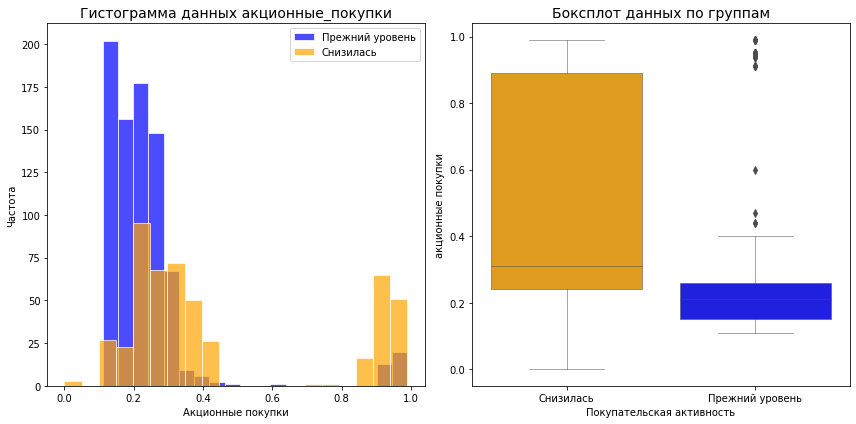

In [144]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['акционные_покупки']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['акционные_покупки']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Акционные покупки')
plt.ylabel('Частота')
plt.title('Гистограмма данных акционные_покупки')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='акционные_покупки', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('акционные покупки')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограммы столбца __акционные_покупки__.Данные распределены не симметрично. Левая половина значительно больше правой. Можно выделить две группы 0 - 0.5 и 0.7-1, в первой группе значений заметно больше. Выбросы есть в группе с прежним уровнем.
Любовь к акционным покупкам свойственна бережливым людям, которые не упескают возможность сэкономить.

3.1.4 Рассмотрим столбец __средний_просмотр_категорий_за_визит__. 

Сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

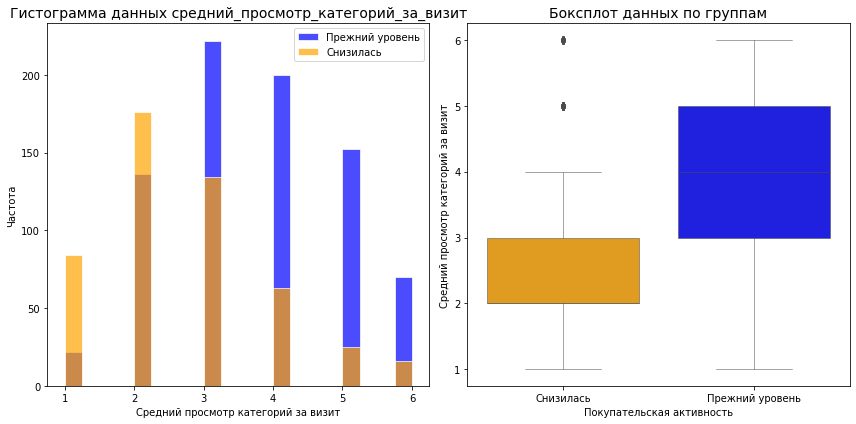

In [145]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['средний_просмотр_категорий_за_визит']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['средний_просмотр_категорий_за_визит']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Cредний просмотр категорий за визит')
plt.ylabel('Частота')
plt.title('Гистограмма данных средний_просмотр_категорий_за_визит')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='средний_просмотр_категорий_за_визит', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Cредний просмотр категорий за визит')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограмма столбца __средний_просмотр_категорий_за_визит__.Данные распределены симметрично. Выбросы в группе со сниженной активностью. Клиенты со сниженной активностью просматривают 1-2 категории в большенстве. 

3.1.5 Рассмотрим столбец __неоплаченные_продукты_штук_квартал__. 

Общее число неоплаченных товаров в корзине за последние 3 месяца.

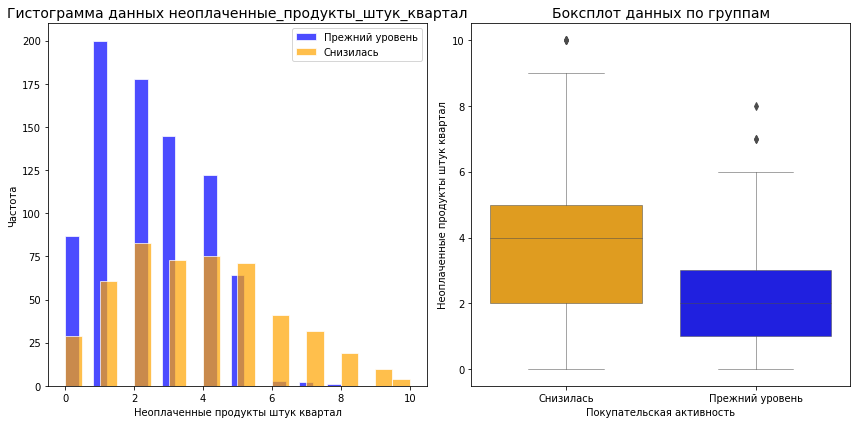

In [146]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['неоплаченные_продукты_штук_квартал']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['неоплаченные_продукты_штук_квартал']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Неоплаченные продукты штук квартал')
plt.ylabel('Частота')
plt.title('Гистограмма данных неоплаченные_продукты_штук_квартал')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='неоплаченные_продукты_штук_квартал', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Неоплаченные продукты штук квартал')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограмма столбца __неоплаченные_продукты_штук_квартал__. Данные имеют положительную асимметрию. Виден перекос вправо, вызванные наличием необычайно высоких значений. Эти слишком большие величины смещают среднее значение вправо, и оно становится больше медианы. Выбросы есть в обоих группах. Группа со сниженной активностью имеет в большинстве 2-5 неоплаченных покупок. 

3.1.6 Рассмотрим столбец __ошибка_сервиса__. 

Число сбоев, которые коснулись покупателя во время посещения сайта.

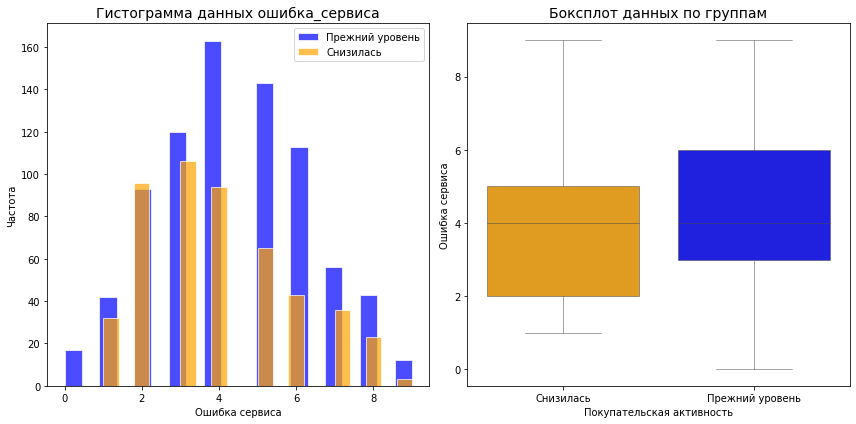

In [147]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['ошибка_сервиса']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['ошибка_сервиса']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=20, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=20, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Ошибка сервиса')
plt.ylabel('Частота')
plt.title('Гистограмма данных ошибка_сервиса')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='ошибка_сервиса', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Ошибка сервиса')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограмма столбца __ошибка_сервиса__.Данные распределены симметрично. Левая и правая половины распределения являются почти своими зеркальными отражениями. Большие и малые величины уравновешивают друг друга, а среднее значение и медиана почти равны между собой. Выбросов нет. Наибольшее число сбоев для группы со сниженной активностью 3.

3.1.7 Рассмотрим столбец __страниц_за_визит__. 

Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

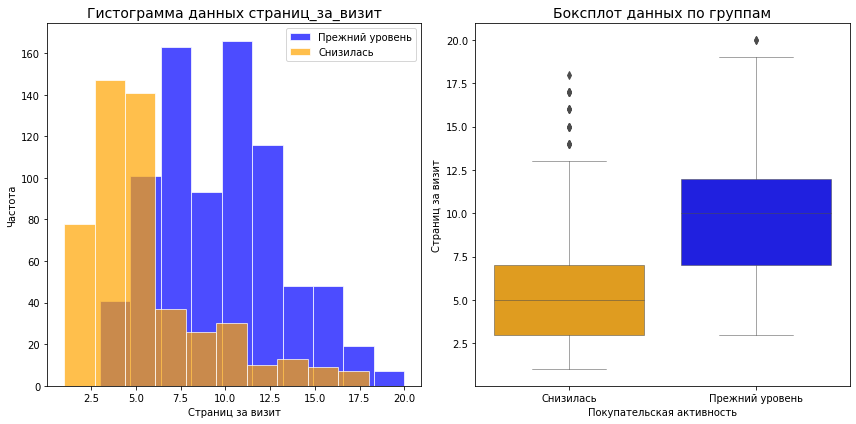

In [148]:
# Разделение данных на подвыборки с разной активностью
same_level_group = market_file[market_file['покупательская активность'] == 'Прежний уровень']['страниц_за_визит']
decreased_group = market_file[market_file['покупательская активность'] == 'Снизилась']['страниц_за_визит']

# Построение гистограмм
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(same_level_group, bins=10, color='blue', alpha=0.7, label='Прежний уровень')
plt.hist(decreased_group, bins=10, color='orange', alpha=0.7, label='Снизилась')
plt.xlabel('Страниц за визит')
plt.ylabel('Частота')
plt.title('Гистограмма данных страниц_за_визит')
plt.legend()

# Построение боксплотов
plt.subplot(1, 2, 2)
sns.boxplot(x='покупательская активность', y='страниц_за_визит', data=market_file, palette=['orange', 'blue'])
plt.xlabel('Покупательская активность')
plt.ylabel('Страниц за визит')
plt.title('Боксплот данных по группам')

plt.tight_layout()
plt.show()

Гистограмма столбца __страниц_за_визит__. Данные имеют положительную асимметрию. Выбросы есть.
Группа со сниженной активностью просматривает в большинстве порядка пяти страниц.

3.1.8 Рассмотрим столбец __выручка__ из датафрейма _market_money_. 

Сумма выручки за период.

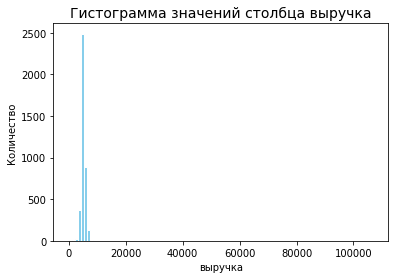

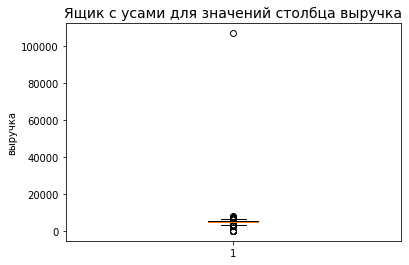

In [149]:
# Гистограмма
plt.hist(market_money['выручка'], bins=100, color='skyblue')
plt.title('Гистограмма значений столбца выручка')
plt.xlabel('выручка')
plt.ylabel('Количество')
plt.show()

# Ящик с усами
plt.boxplot(market_money['выручка'])
plt.title('Ящик с усами для значений столбца выручка')
plt.ylabel('выручка')
plt.show()

In [150]:
market_money.describe()

,id,выручка
count,3900.00,3900.00
mean,215997.50,5025.70
std,375.33,1777.70
min,215348.00,0.00
25%,215672.75,4590.15
50%,215997.50,4957.50
75%,216322.25,5363.00
max,216647.00,106862.20


Выявленно аномально большое значение в выручке, похоже на единичный выброс. Удалим его.

In [151]:
# Выброс - это значение выручки больше 100000
# Локализация и удаление выброса
market_money = market_money[market_money['выручка'] <= 100000]

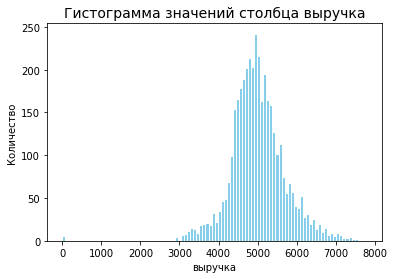

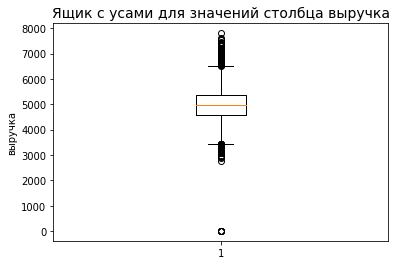

In [152]:
# Гистограмма
plt.hist(market_money['выручка'], bins=100, color='skyblue')
plt.title('Гистограмма значений столбца выручка')
plt.xlabel('выручка')
plt.ylabel('Количество')
plt.show()

# Ящик с усами
plt.boxplot(market_money['выручка'])
plt.title('Ящик с усами для значений столбца выручка')
plt.ylabel('выручка')
plt.show()

Теперь виден выброс в интервале значений до 1000. Удалим его.

In [153]:
# Выброс - это значение выручки меньше 1000
# Локализация и удаление выброса
market_money = market_money[market_money['выручка'] >= 1000]

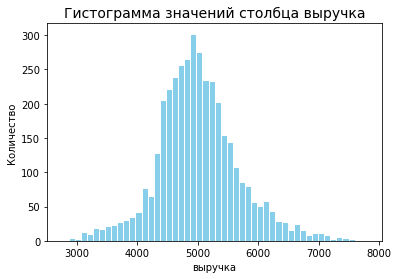

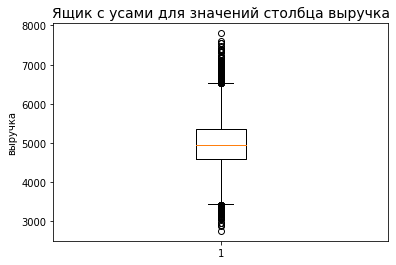

In [154]:
# Гистограмма
plt.hist(market_money['выручка'], bins=50, color='skyblue')
plt.title('Гистограмма значений столбца выручка')
plt.xlabel('выручка')
plt.ylabel('Количество')
plt.show()

# Ящик с усами
plt.boxplot(market_money['выручка'])
plt.title('Ящик с усами для значений столбца выручка')
plt.ylabel('выручка')
plt.show()

Теперь гистограмма практически симметрична, но видны выбросы. Оставим как есть.

3.1.9 Рассмотрим столбец __минут__ из датафрейма _market_time_. 

В столбце значения времени, проведённого на сайте, в минутах.

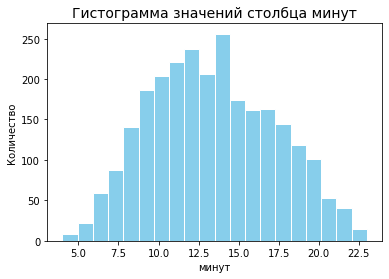

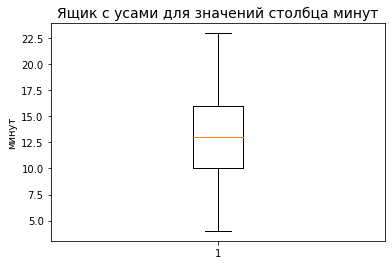

In [155]:
# Гистограмма
plt.hist(market_time['минут'], bins=20, color='skyblue')
plt.title('Гистограмма значений столбца минут')
plt.xlabel('минут')
plt.ylabel('Количество')
plt.show()

# Ящик с усами
plt.boxplot(market_time['минут'])
plt.title('Ящик с усами для значений столбца минут')
plt.ylabel('минут')
plt.show()

Гистограмма столбца __минут__.Данные распределены симметрично. Левая и правая половины распределения являются почти своими зеркальными отражениями. Большие и малые величины уравновешивают друг друга, а среднее значение и медиана почти равны между собой. Выбросов нет.

3.1.10 Рассмотрим столбец __прибыль__ из датафрейма _money_. 

Среднемесячная прибыль покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

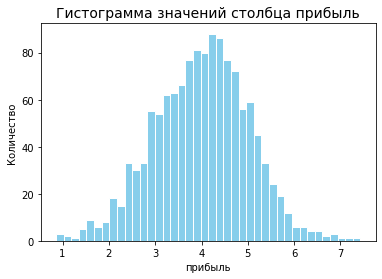

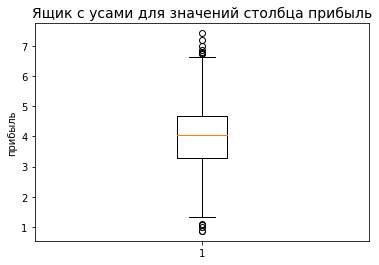

In [156]:
# Гистограмма
plt.hist(money['прибыль'], bins=40, color='skyblue')
plt.title('Гистограмма значений столбца прибыль')
plt.xlabel('прибыль')
plt.ylabel('Количество')
plt.show()

# Ящик с усами
plt.boxplot(money['прибыль'])
plt.title('Ящик с усами для значений столбца прибыль')
plt.ylabel('прибыль')
plt.show()

Гистограмма столбца __прибыль__.Данные распределены практически симметрично. Левая и правая половины распределения являются почти своими зеркальными отражениями. Большие и малые величины уравновешивают друг друга, а среднее значение и медиана почти равны между собой. Выбросы есть.

3.2 Проанализируем качественные признаки 

3.2.1 Рассмотрим столбец __покупательская активность__ датафрейма _market_file_.

Рассчитанный класс покупательской активности (__целевой признак__): «снизилась» или «прежний уровень».

In [157]:
# Количество категорий
subscription_counts = market_file['покупательская активность'].value_counts()
subscription_counts

Прежний уровень    802
Снизилась          498
Name: покупательская активность, dtype: int64

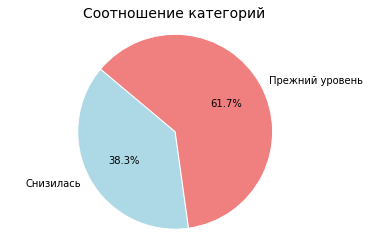

In [158]:
# Визуализация
labels = 'Снизилась', 'Прежний уровень'
sizes = [subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral']

# График
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение категорий')
plt.show()

Как мы видим преобладает класс - Прежний уровень.

3.2.2 Рассмотрим столбец __тип сервиса__ датафрейма _market_file_.

Уровень сервиса, например «премиум» и «стандарт».

In [159]:
# Количество категорий
subscription_counts = market_file['тип сервиса'].value_counts()
subscription_counts

стандарт    924
премиум     376
Name: тип сервиса, dtype: int64

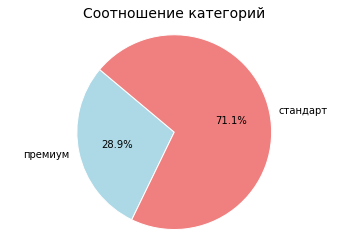

In [160]:
# Визуализация
labels = 'премиум', 'стандарт'
sizes = [subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral']

# График
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение категорий')
plt.show()

Видно, что клиенты выбирают тип сервиса - стандарт в 71,1% случаев.

3.2.3 Рассмотрим столбец __разрешить сообщать__ датафрейма _market_file_.

Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

In [161]:
# Количество категорий
subscription_counts = market_file['разрешить сообщать'].value_counts()
subscription_counts

да     962
нет    338
Name: разрешить сообщать, dtype: int64

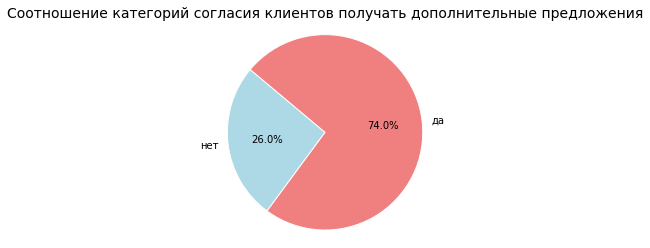

In [162]:
# Визуализация
labels = 'нет', 'да'
sizes = [subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral']

# График
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение категорий согласия клиентов получать дополнительные предложения')
plt.show()

Клиенты в 74% случаев соглашаются на получение дополнительных предложений на товары.

3.2.4 Рассмотрим столбец __популярная_категория__ датафрейма _market_file_.

Самая популярная категория товаров у покупателя за последние 6 месяцев.

In [163]:
# Количество категорий
subscription_counts = market_file['популярная_категория'].value_counts()
subscription_counts

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

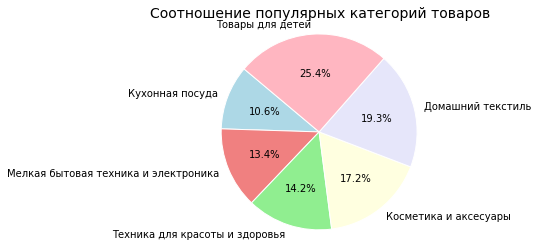

In [164]:
# Визуализация
labels = ['Кухонная посуда' , 'Мелкая бытовая техника и электроника', 
         'Техника для красоты и здоровья', 'Косметика и аксесуары', 'Домашний текстиль',
         'Товары для детей']
sizes = [subscription_counts[5],subscription_counts[4],subscription_counts[3],
         subscription_counts[2], subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lavender', 'lightpink']

# График 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение популярных категорий товаров')
plt.show()

Наиболее популярная категория у клиентов - товары для детей (далее по убыванию), домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда.

3.2.4 Рассмотрим столбец __период__ датафрейма _market_money_.

Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

In [165]:
# Количество категорий
subscription_counts = market_money['период'].value_counts()
subscription_counts

текущий_месяц          1299
предыдущий_месяц       1297
препредыдущий_месяц    1297
Name: период, dtype: int64

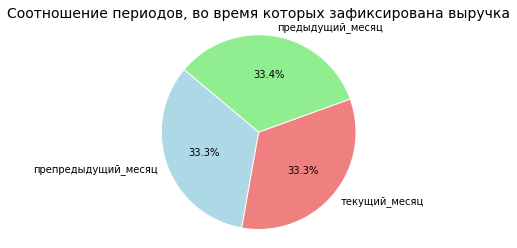

In [166]:
# Визуализация
labels = ['препредыдущий_месяц' , 'текущий_месяц', 
         'предыдущий_месяц']
sizes = [subscription_counts[2], subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral', 'lightgreen']

# График 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение периодов, во время которых зафиксирована выручка')
plt.show()

Распределение выручки по всем трем периодам происходило равномерно.

3.2.5 Рассмотрим столбец __период__ датафрейма _market_time_.

Название периода, во время которого зафиксировано общее время проведенное на сайте.

In [167]:
# Количество категорий
subscription_counts = market_time['период'].value_counts()
subscription_counts

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

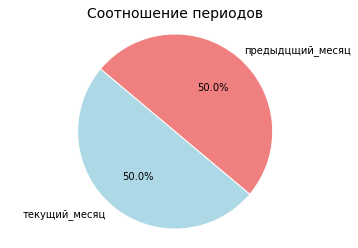

In [168]:
# Визуализация
labels = 'текущий_месяц', 'предыдцщий_месяц'
sizes = [subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral']

# График
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение периодов')
plt.show()

Соотношение периодов равномерно.

3.3 Выводы о данных.

Количественные признаки:
- Датафрейм _market_file_:
  - признак __маркет_ актив_ 6 _мес__ - гистограмма распределена симметрично, выбросы в столбце есть, поскольку это реалистичные данные оставим всё как есть;
  - признак __длительность__, гистограмма симметрична, выбросов нет;
  - признак __акционные_покупки__, данные распределены не симметрично, левая половина значительно больше правой, можно выделить две группы 0 - 0.5 и 0.7-1, в первой группе значений заметно больше, выбросы есть, оставили их;
  - признак __средний_просмотр_категорий_за_визит__, данные распределены симметрично, выбросов нет;
  - признак __неоплаченные продукты_штук_квартал__, гистограмма имеет положительную асимметрию, виден перекос вправо, выбросы есть, не удаляли их;
  - признак __ошибка_сервиса__, гистограмма симметрична, выбросов нет;
  - признак __неоплаченные страниц_за_визит__, данные имеют положительную асимметрию. Виден перекос вправо, выбросов нет;
  - признак __страниц_за_визит__, гистограмма имеет положительную асимметрию, перекос вправо, выбросов нет.
 
- Датафрейм _market_money_:
  - признак __выручка__, были обнаружены единичные выбросы в интервале до 1000 и более 100000, выбросы удалены, после удаления гистограмма практически симметрична, но видны выбросы, оставили их;
- Датафрейм _market_time_:
  - признак __минут__, гистограмма симметрична, выбросов нет.
- Датафрейм _money_:
  - признак __прибыль__, данные распределены практически симметрично, выбросы есть.
    
Категориалные признаки:
- Датафрейм _market_file_:
  - признак __покупательская активность (целевой признак)__, преобладает рассчитанный класс покупательской активности - Прежний уровень;
  - признак __тип сервиса__, клиенты чаще выбирают тип сервиса - стандарт в 71,1% случаев;
  - признак __разрешить сообщать__, клиенты в 74% случаев соглашаются на получение дополнительных предложений на товары;
  - признак __популярная_категория__, наиболее популярная категория у клиентов - товары для детей (далее по убыванию), домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда.
- Датафрейм _market_money_:
  - признак __период__, распределение выручки по всем периодам происходило равномерно.
- Датафрейм _market_time_:
  - признак __период__, соотношение периодов равномерно.
  
В целом можно сказать, что клиенты о большей своей массе сохраняют покупательскую активность на прежнем уровне, предпочитают тип сервиса стандарт, соглашаются на получение дополнительных предложений на товары, больше всего их интересуют товары для детей, домашний текстиль и косметика, что характеризует целевую аудиторию как преимущественно женскую, выручка равномерна в течении трех ближайших месяцев, время проведения на сайте остается прежним от месяца к месяцу. 

Рекомендуется создать привликательные дополнительные предложения о товарах ориентированных на замужних женщин с детьми, а так же улучшить для этой категории клиентов предложения в типе сервиса премиум, с целью перехода на этот тип. Создать интересные для целевой аудитории предложения к Новому году, 23 февраля и началу сезона отдыха. Эти предложения должны посысить выручку в декабре, январе и мае. А так же добавить метрику по отслеживанию пола клиента, если это возжожно. Как правило женщины больше времени проводят за покупками. Эта метрика могла бы потвердить или опровергнуть гипотезу о женской целевой аудитории, что в свою очередь поможет отделу маркетинга усовершенствовать свои предложения для клиентов.

###  Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv.

Учтём, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

4.1 Подготовим к объединению датафрейм __market_money__.

In [169]:
# Создание копии датафрейма market_money с целью сохранения исходных данных
market_money_for_merge = market_money.copy()

In [170]:
# Создание сводной таблицы
market_money_for_merge_table = market_money_for_merge.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')

# Вывод сводной таблицы
market_money_for_merge_table

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.10
215349,5216.00,4472.00,4971.60
215350,5457.50,4826.00,5058.40
215351,6158.00,4793.00,6610.40
215352,5807.50,4594.00,5872.50
...,...,...,...
216643,3664.00,4704.00,4741.70
216644,4729.00,5299.00,5353.00
216645,5160.00,5334.00,5139.20


In [171]:
# Отбор строк, где ни в одном из столбцов нет нулей
filtered_market_money = market_money_for_merge_table[(market_money_for_merge_table >= 0).all(axis=1)]
filtered_market_money

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.00,4472.00,4971.60
215350,5457.50,4826.00,5058.40
215351,6158.00,4793.00,6610.40
215352,5807.50,4594.00,5872.50
215353,4738.50,5124.00,5388.50
...,...,...,...
216643,3664.00,4704.00,4741.70
216644,4729.00,5299.00,5353.00
216645,5160.00,5334.00,5139.20


In [172]:
# Создание копии датафрейма market_time с целью сохранения исходных данных
market_time_for_merge = market_time.copy()

In [173]:
# Создание сводной таблицы
market_time_for_merge_table = market_time_for_merge.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')

# Вывод сводной таблицы
market_time_for_merge_table

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [174]:
# Отбор строк, где ни в одном из столбцов нет нулей
filtered_market_time = market_time_for_merge_table[(market_time_for_merge_table >= 0).all(axis=1)]
filtered_market_time

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


4.2 Объеденим датафреймы в итоговый датафрейм merged_df

In [175]:
# Объединение датафрейма market_file и market_money_for_merge
merged_df = pd.merge(market_file, filtered_market_money, on='id')

# Объединение датафрейма merged_df и market_time_for_merge
merged_df = pd.merge(merged_df, market_time_for_merge_table, on='id')

In [176]:
merged_df.rename(columns={'предыдущий_месяц_x': 'выручка_пред_мес'}, inplace=True)
merged_df.rename(columns={'препредыдущий_месяц': 'выручка_препред_мес'}, inplace=True)
merged_df.rename(columns={'текущий_месяц_x': 'выручка_тек_мес'}, inplace=True)
merged_df.rename(columns={'предыдущий_месяц_y': 'минуты_пред_мес'}, inplace=True)
merged_df.rename(columns={'текущий_месяц_y': 'минуты_тек_мес'}, inplace=True)

In [177]:
# Проверка
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская активность            1296 non-null   object 
 2   тип сервиса                          1296 non-null   object 
 3   разрешить сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [178]:
# Проверим дубликаты и выведем их сумму
merged_df.duplicated().sum()

0

Дубликатов нет.

In [179]:
# Проверка количества пропусков
merged_df.isna().sum()

id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_пред_мес                       0
выручка_препред_мес                    0
выручка_тек_мес                        0
минуты_пред_мес                        0
минуты_тек_мес                         0
dtype: int64

Пропусков нет.

### Корреляционный анализ

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

5.1 Ранее было замечено, что не все признаки распределены нормально, по этому нужно использовать корреляцию Спирмана, которая устойчива к выбросам и ненормальному распределению.

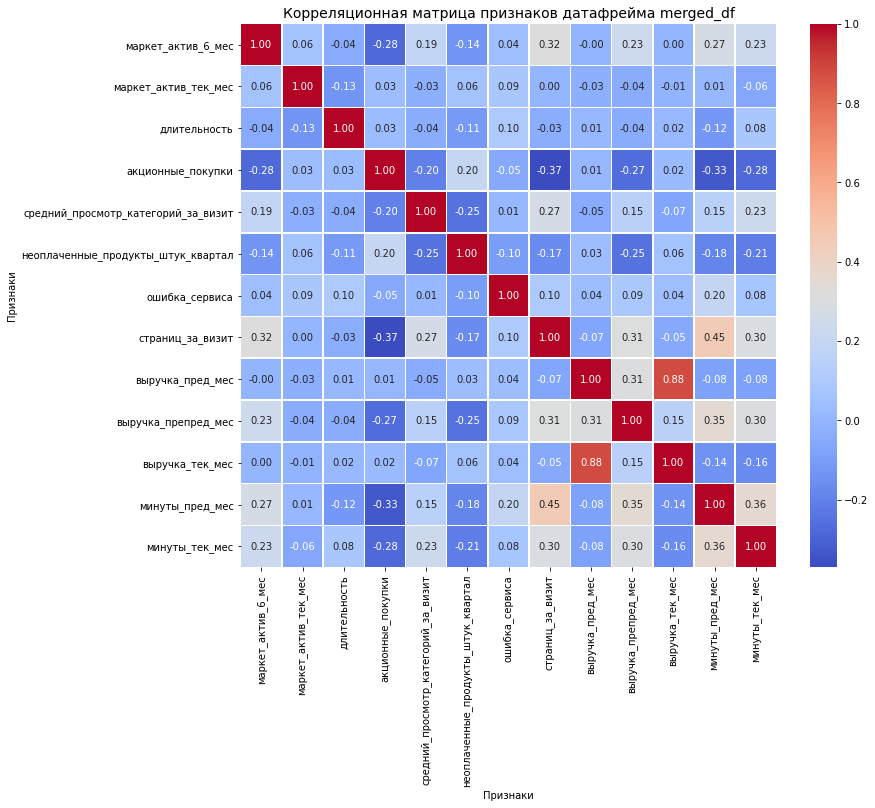

In [180]:
# Удаление столбца id из датафрейма merged_df
merged_df_matrix = merged_df.drop('id', axis=1)

# Установка опции отображения для вывода трех знаков после запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Расчет корреляционной матрицы методом Спирмана
spearman_corr_matrix = merged_df_matrix.corr(method='spearman')

# Создание тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Настройка заголовка и меток осей
plt.title('Корреляционная матрица признаков датафрейма merged_df')
plt.xlabel('Признаки')
plt.ylabel('Признаки')

# Отображение графика
plt.show()

Построенная корреляционная матрица позволяет увидеть, что в основном признаки обладают средней положительной либо отрицательной связью. Мультиколлинеарность возможна между признаками текущий_месяц и предудущий месяц. Метод основанный на важности признаков (например, на основе деревьев решений), может помочь выделить наиболее важные признаки, и тем самым снизить влияние мультиколлинеарности. У остальных признаков мультиколлинеарность отсуствует.

5.2 Диаграммы рассеяния.

5.2.1 Посторим диаграммы рассеивания признака __выручка_препред_мес__ и остальных количественных признаков.

In [181]:
# Выделение количественных признаков. Индексом отсечем id и выручка_препредыдущий_месяц
merged_df._get_numeric_data().columns[1:9]

Index(['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

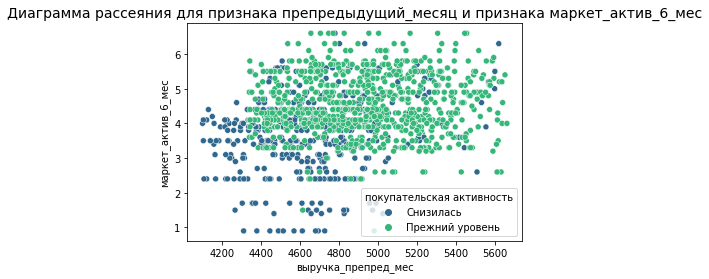

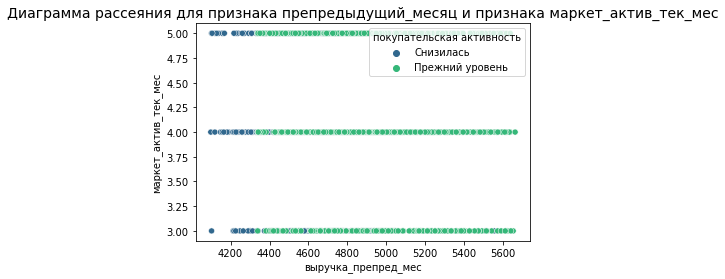

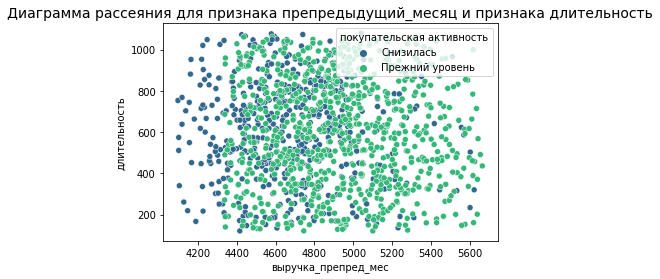

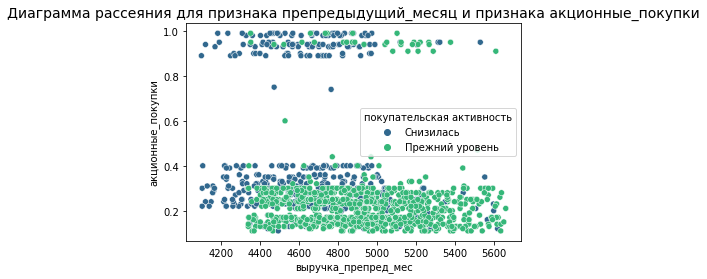

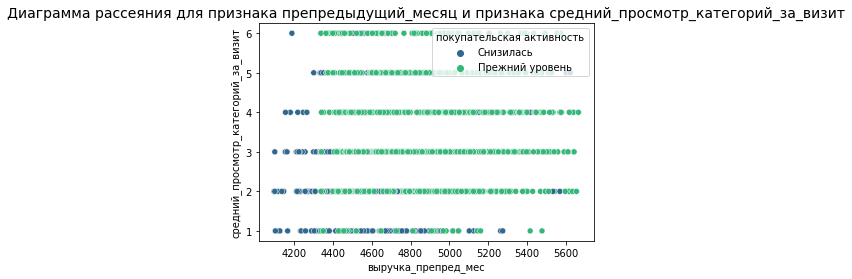

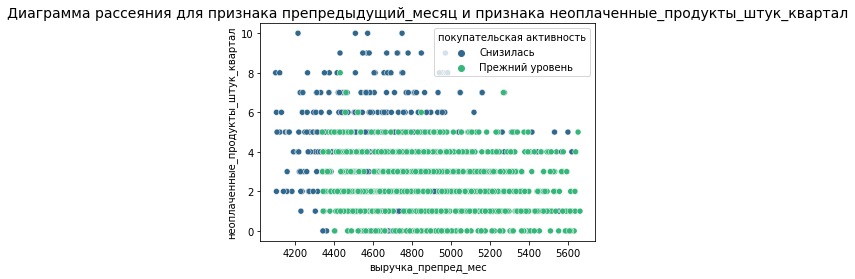

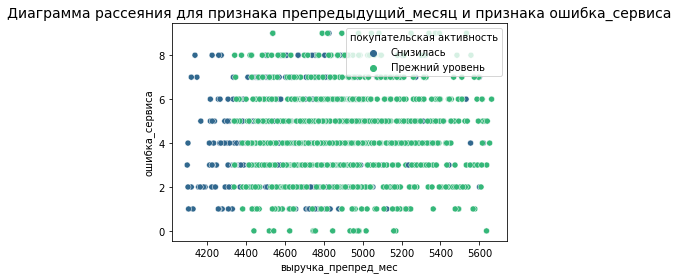

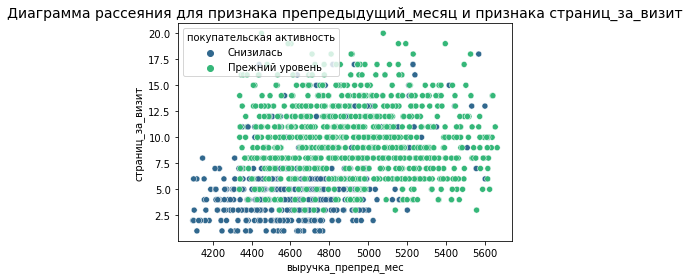

In [182]:
# Цикл для построения графиков
for i in merged_df._get_numeric_data().columns[1:9]:
    sns.scatterplot(data=merged_df, x='выручка_препред_мес', y=i, hue='покупательская активность', palette='viridis')
    plt.title(f'Диаграмма рассеяния для признака препредыдущий_месяц и признака {i}')
    plt.show()

В результате изучения диаграмм рассеивания признака _препредыдущий_месяц_ можно сделать следующие выводы:
- клиентов можно разделить на две группы - первая с выручкой примерно до 4300(характеризуется снижением покупательской активности) и остальные.
  - маркетологическая активность в течение 6 месяцев оказала положительное линейное влияние на рост выручки, если количество взаимодействий с клиентом менее двух, снижается покупательская активность, взаимодействие от 2 до 5, свойственно группе со сниженной активностью, возможно эта группа находит такую активность назойливой;
  - если доля покупок по акции начинает составлять 0.3 от общего числа, то снижается покупательская активность, это можно связать с нежеланием клиента платить полную стоимость товаров, вне акций;
  - средний просмотр одной категории характеризуется снижением покупательской активности, видимо клиент заходит на сайт с определенной целью и не найдя товара, сразу покидает сайт;
  - клиенты со сниженной активностью, характеризуются ростом числа неоплаченных продуктов, вероятно клиент забывает про отложенные товары;
  - клиенты со сниженной активностью, почти не смотрят более 7.5 страниц за визит, эти клиенты так же приходят с конретной целью.

5.2.2 Посторим диаграммы рассеивания признака __выручка_пред_мес__ и остальных количественных признаков.

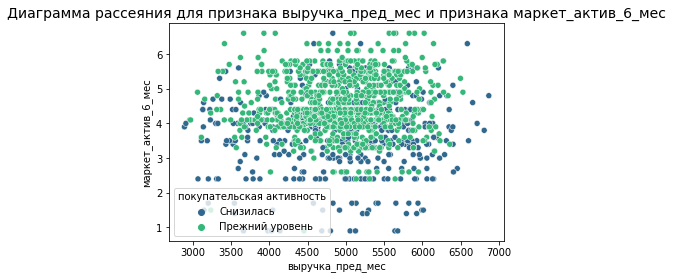

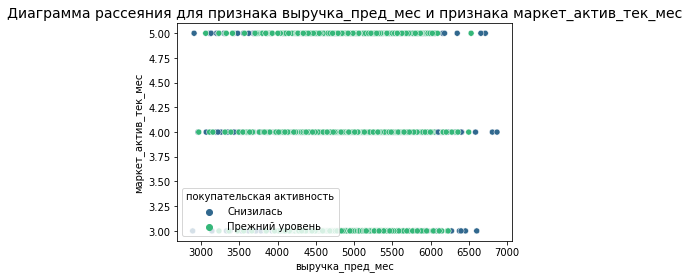

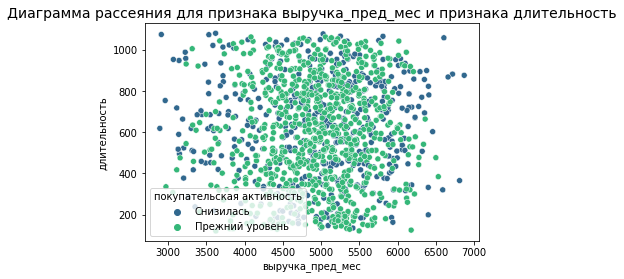

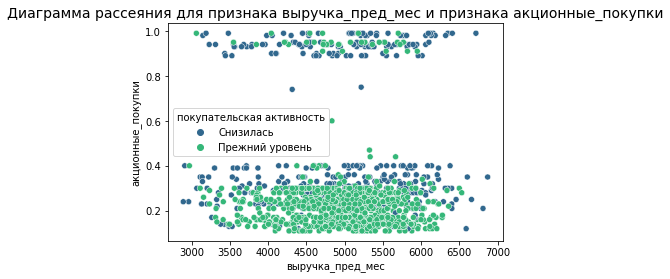

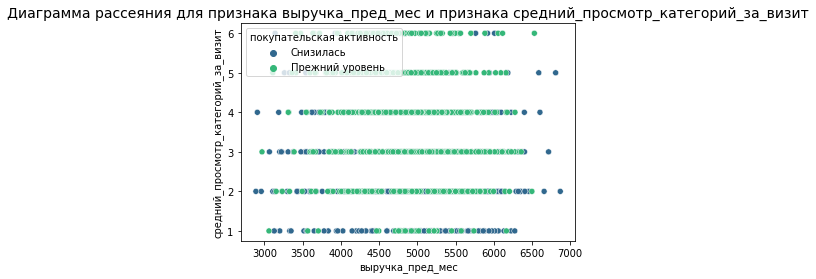

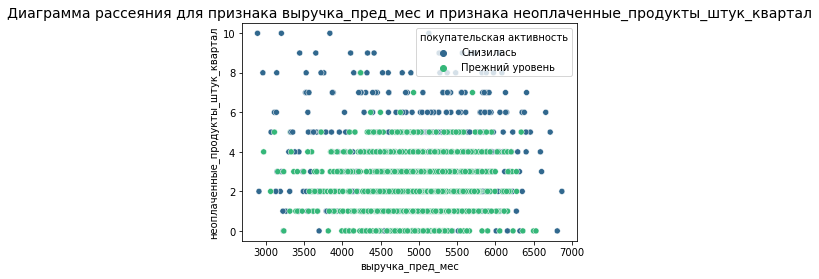

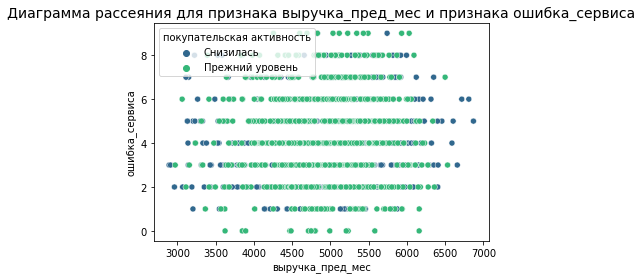

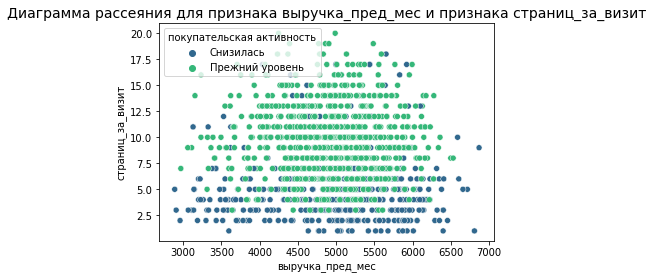

In [183]:
# Цикл для построения графиков
for i in merged_df._get_numeric_data().columns[1:9]:
    sns.scatterplot(data=merged_df, x='выручка_пред_мес', y=i, hue='покупательская активность', palette='viridis')
    plt.title(f'Диаграмма рассеяния для признака выручка_пред_мес и признака {i}')
    plt.show()

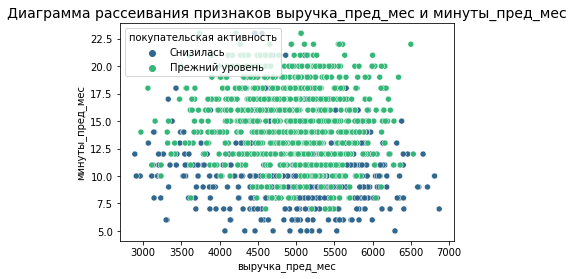

In [184]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='выручка_пред_мес', y='минуты_пред_мес', hue='покупательская активность', data=merged_df, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания признаков выручка_пред_мес и минуты_пред_мес')

# Отображение графика
plt.show()

Тенденции для группы со сниженной активностью сохраняются.

In [185]:
merged_df.columns

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_пред_мес', 'выручка_препред_мес',
       'выручка_тек_мес', 'минуты_пред_мес', 'минуты_тек_мес'],
      dtype='object')

5.2.3 Посторим диаграммы рассеивания признака __выручка_тек_мес__ и остальных количественных признаков.

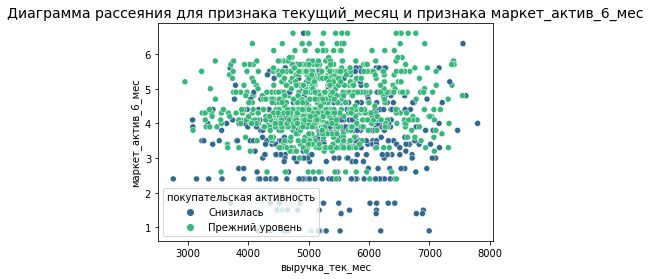

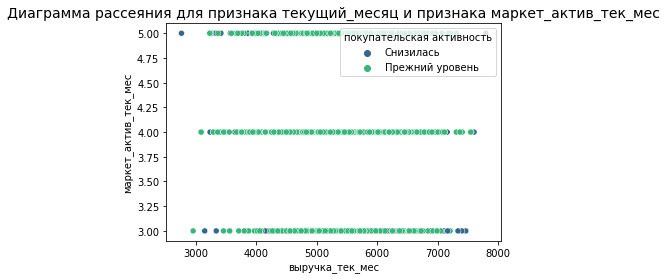

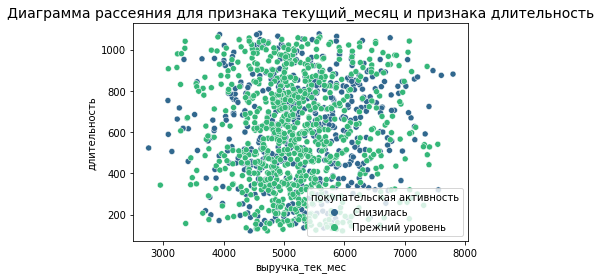

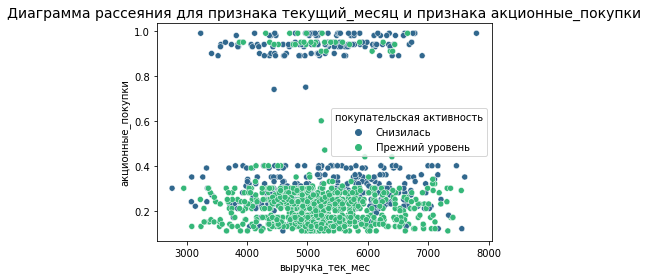

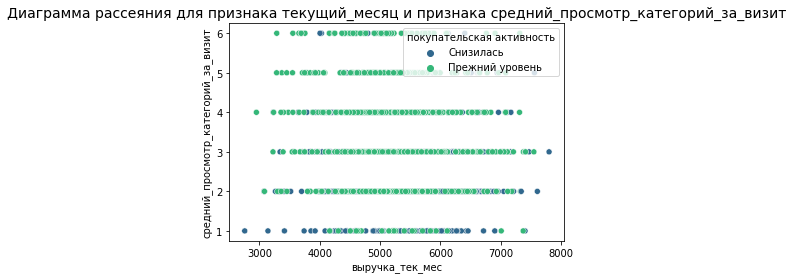

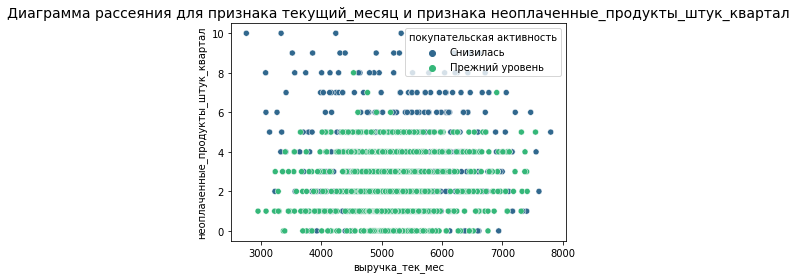

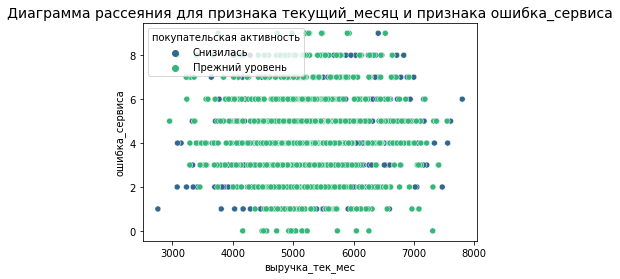

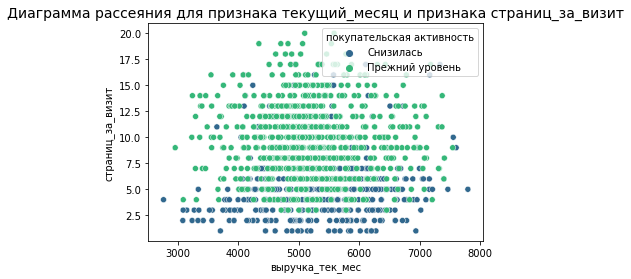

In [186]:
# Цикл для построения графиков
for i in merged_df._get_numeric_data().columns[1:9]:
    sns.scatterplot(data=merged_df, x='выручка_тек_мес', y=i, hue='покупательская активность', palette='viridis')
    plt.title(f'Диаграмма рассеяния для признака текущий_месяц и признака {i}')
    plt.show()

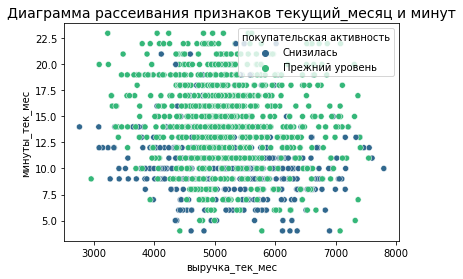

In [187]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='выручка_тек_мес', y='минуты_тек_мес', hue='покупательская активность', data=merged_df, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания признаков текущий_месяц и минут')

# Отображение графика
plt.show()

Итоговый вывод:
- матрица корреляции выявила среднюю и слабую положительную и отрицательную зависимости признаков;
- анализ диаграмм рассеивания признаков по месячно выявил снижение связи выручки и маркетинговой активности за последние 6 месяцев, это говорит о том, что три месяца назад была положительная взамосвясь активности в вуручкой, а в последующий месяц она пропала и эта тендеция распространилась и на текущий месяц;
- остальные признаки сохранили свои взаимосвязи без изменений.

### Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.

6.1 Подготовим данные с помощью ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Для каждой модели можем подготовить данные с разным кодированием и масштабированием.

In [188]:
# Создаем тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop(['id', 'покупательская активность'], axis=1),
    merged_df['покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = merged_df['покупательская активность'])

6.2 Обучим четыре модели: 
- KNeighborsClassifier(), 
- DecisionTreeClassifier(), 
- LogisticRegression(),
- SVC().

Для каждой из них подберем как минимум один гиперпараметр. Подходящей для задачи метрикой будет roc_auc, поскольку она часто используется в задачах бинарной классификации, и она предоставляет информацию о качестве модели, учитывая как чувствительность (True Positive Rate), так и специфичность (True Negative Rate).

In [189]:
# списки с названиями признаков
ohe_columns = ['тип сервиса', 'разрешить сообщать']
ord_columns = ['маркет_актив_тек_мес', 'популярная_категория',
               'средний_просмотр_категорий_за_визит', 
               'ошибка_сервиса']
num_columns = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 
               'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 
               'выручка_пред_мес', 'выручка_препред_мес',
               'выручка_тек_мес', 'минуты_пред_мес', 'минуты_тек_мес']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['5', '4', '3'],
                    ['Кухонная посуда' , 'Мелкая бытовая техника и электроника', 
                     'Техника для красоты и здоровья', 'Косметика и аксесуары', 
                     'Домашний текстиль', 'Товары для детей'],
                    ['6', '5', '4', '3', '2', '1'],
                    ['9', '8', '7', '6', '5', '4', '3', '2', '1', '0'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)
param_distributions = [
    # словарь для модели KNeighborsClassifier() 
    {
        # название модели
        'models': [KNeighborsClassifier()],
        # указываем гиперпараметр модели n_neighbors
        'models__n_neighbors': range(2, 5),
        # указываем список методов масштабирования
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC(random_state=RANDOM_STATE)

    {
       'models': [SVC(random_state=RANDOM_STATE)],
       'models__degree': range(2, 17),                        # Степень полинома 
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

   },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train) 
print('Метрика roc_auc для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 



Метрика roc_auc для лучшей модели:
 0.8845105030650485

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип сервиса',
                                                   'разрешить сообщать']),
                                                 (

Благодаря использованию пайплайна и инструмента подбора гиперпараметров для каждой модели отдельно, выявлена лучшая модель - LogisticRegression(random_state=42). Метрика roc_auc для этой модели: 0.8845.

### Анализ важности признаков

7.1 Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

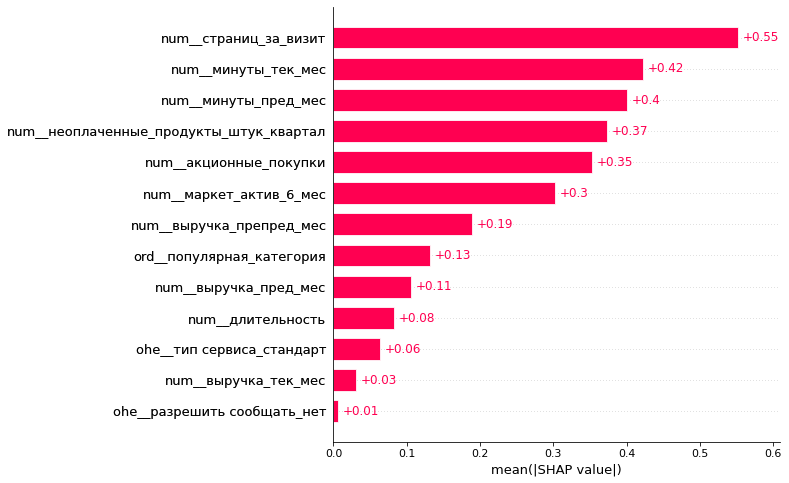

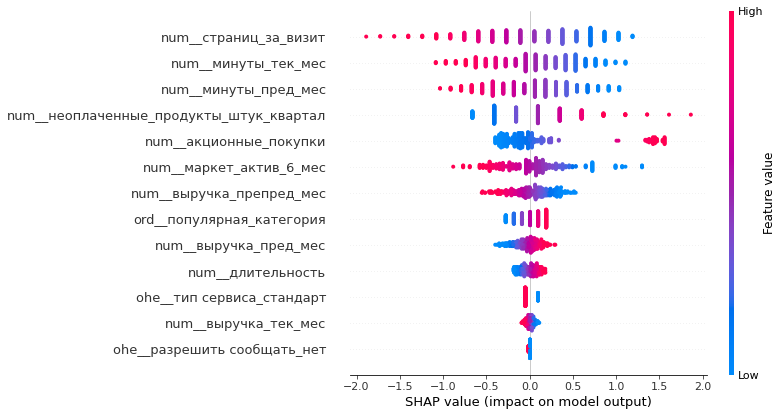

In [190]:
X_train_best = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_best = pipe_final.named_steps['preprocessor'].transform(X_test)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_best = pd.DataFrame(X_test_best, columns=feature_names)

# Создание объекта Explainer для модели 
explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_best) 
shap_values = explainer(X_test_best)

# График важности признаков обученной модели логистической регрессии.  
shap.plots.bar(shap_values, max_display=22)
shap.plots.beeswarm(shap_values, max_display=22) 


7.2 Выводы о значимости признаков.
- признаки __выручка_препред_мес, популярная_категория, выручка_пред_мес, длительность, тип сервиса (стандарт), выручка_тек_мес и разрешить сообщать(нет)__ мало значимы для модели; 
- признаки __маркет_ актив_ 6_ мес, акционные_покупки, неоплаченные_продукты_штук_квартал, минуты_пред_мес, минуты_тек_мес, страниц_за_визит__ сильнее всего влияют на целевой признак.

Интерпретация SHAP значений может предоставить ценную информацию для бизнес-решений:
- _Фокус на ключевых признаках_ - поскольку некоторые признаки, такие как "маркет_актив_6_мес", "акционные_покупки", "неоплаченные_продукты_штук_квартал" и другие, сильнее всего влияют на целевой признак, можно сосредоточить внимание на этих признаках при разработке маркетинговых стратегий, предложениях или сегментации клиентов.
- _Оптимизация взаимодействия с клиентами_ - если тип сервиса ("стандарт") и разрешение на сообщения ("нет") оказывают малое влияние, это может быть важным сигналом для адаптации стратегий взаимодействия с клиентами. Возможно, стоит пересмотреть подход к клиентам со стандартным типом сервиса или разработать дополнительные меры для тех, кто не желает получать уведомления.
- _Мониторинг и анализ_ - временные показатели, такие как "выручка_тек_мес", "выручка_пред_мес", "минуты_тек_мес" и "минуты_пред_мес", могут быть использованы для мониторинга и анализа динамики клиентского поведения. Их изменения могут помочь в понимании эволюции активности клиентов.

###  Сегментация покупателей

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

In [192]:
customers = merged_df.copy()
# Объединение датафрейма merged_df и money
customers = pd.merge(customers, money, on='id')

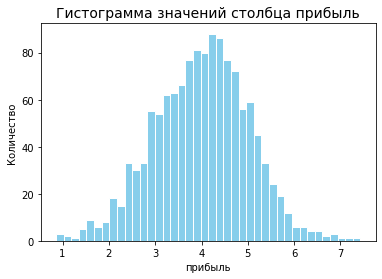

In [193]:
# Гистограмма
plt.hist(money['прибыль'], bins=40, color='skyblue')
plt.title('Гистограмма значений столбца прибыль')
plt.xlabel('прибыль')
plt.ylabel('Количество')
plt.show()

По данному графику видно, что на рубеже примерно 4.3 порисходит падение числа прибыльности клиентов. Нужно установить причины этого процесса и предложить решения проблемы. Сегментируем этих клиентов. Проведем исследования, что могло бы увеличить эту группу.

In [194]:
# Фильтрация клиентов с прибылью более 4.3
customers_with_profit_more_4_3 = customers[customers['прибыль'] >= 4.3]

# Вывод отфильтрованных данных
customers_with_profit_more_4_3

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес,прибыль
2,215351,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4,6158.00,4793.00,6610.40,11,13,4.87
6,215355,Снизилась,стандарт,нет,4.70,4,284,0.17,Товары для детей,5,1,6,4,3263.00,4749.00,3772.60,12,10,5.26
7,215356,Снизилась,стандарт,да,4.20,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.50,4433.00,4566.40,6,7,4.93
9,215360,Снизилась,премиум,да,3.90,3,623,0.35,Кухонная посуда,3,1,4,7,5304.50,5555.00,5834.90,9,6,4.55
17,215368,Снизилась,премиум,да,3.80,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.00,4536.00,5591.60,11,9,6.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,216631,Прежний уровень,стандарт,да,3.00,3,455,0.24,Кухонная посуда,5,0,7,7,4582.00,4735.00,4844.60,17,17,4.61
1289,216641,Прежний уровень,стандарт,да,4.10,4,638,0.22,Техника для красоты и здоровья,4,1,6,14,5654.50,5176.00,6199.20,14,12,4.50
1290,216642,Прежний уровень,премиум,да,4.20,3,991,0.40,Мелкая бытовая техника и электроника,4,3,5,12,4589.50,5011.00,4354.20,19,19,5.63
1291,216643,Прежний уровень,стандарт,да,6.60,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.00,4704.00,4741.70,14,7,4.44


8.2 Предложения, как увеличить её покупательскую активность проблемной группы.

8.2.1 Графическое и аналитическое исследование проблемной группы покупателей.

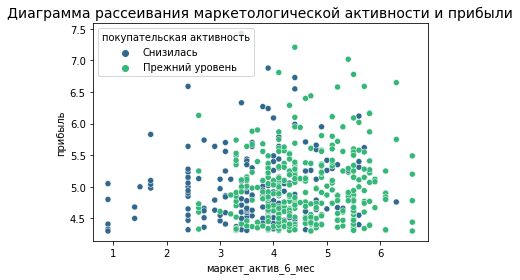

In [195]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='маркет_актив_6_мес', y='прибыль', hue='покупательская активность', data=customers_with_profit_more_4_3, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания маркетологической активности и прибыли')

# Отображение графика
plt.show()

Появление высокой прибыльности появляется от 4 до 6 активных макетологических действий.

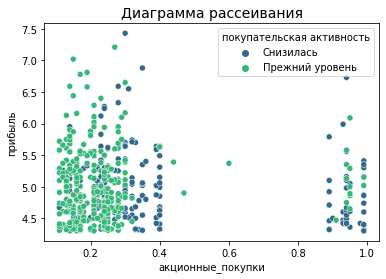

In [196]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='акционные_покупки', y='прибыль', hue='покупательская активность', data=customers_with_profit_more_4_3, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания')

# Отображение графика
plt.show()

Проявления высокой прибыльности появляются чаще у клиентов с числом акционных покупок до 0.4.

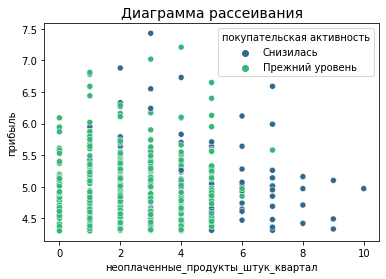

In [197]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='неоплаченные_продукты_штук_квартал', y='прибыль', hue='покупательская активность', data=customers_with_profit_more_4_3, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания')

# Отображение графика
plt.show()

У высоко прибыльных клиентов может быть до 7 неоплаченных покупок, у менее прибыльных их чуть меньше.

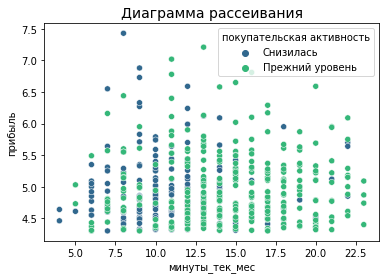

In [198]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='минуты_тек_мес', y='прибыль', hue='покупательская активность', data=customers_with_profit_more_4_3, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания')

# Отображение графика
plt.show()

Высоко прибыльные клиенты провели от 7 до 20 минут на сайте. Более многочисленная группа с меньшей прибыльность проводит до 22.5 минут на сайте.

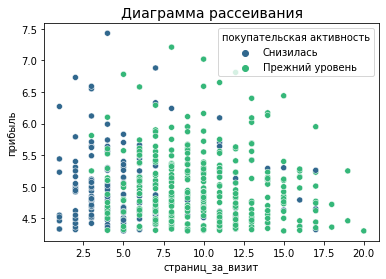

In [199]:
# Создание диаграммы рассеивания с seaborn
sns.scatterplot(x='страниц_за_визит', y='прибыль', hue='покупательская активность', data=customers_with_profit_more_4_3, palette='viridis')

# Настройка заголовка
plt.title('Диаграмма рассеивания')

# Отображение графика
plt.show()

Высоко прибыльные клиенты просматривают как правило до 14 страниц за визит, у менее прибыльных их больше.

8.2.2 Предложения по работе с сегментом для увеличения покупательской активности.

1. Рекомендованное число активных маркетологических взаимодействий с группой от 4 до 6, клиенты находят это число комфортным. Взаимодействия необходимо связать с самой часто оплачиваемой категорий товаров и смежной с ней.
2. Направить действия на сокращение акционных покупок до 0.3.
3. Направить меры на сокращение неоплаченных покупок (напоминания и брошенной покупке, небольшая дополнительная скидка по покупку, напоминание о том что скоро этот товар кончится и т.п.)
4. Добиться просмотра страниц не менее 14 (увеличение при просмотре похожих или смежных товаров)

8.3 Дополнительный сегмент - клиенты с прибыльностью более 6.

Сегмент клиентов с прибыльность более 6 является наиболее перспективным, так как приносит самую высокую прибыль и имеет потенциал к численному росту. Поведение в целом такое-же как и сегмента 4.3 - 6, но есть потенциал в росте стоимости покупки и расширении ассортимента магазина в сторону дорогостоящих товаров.

In [206]:
# Фильтрация клиентов с прибылью более 4.3
customers_with_profit_more_6 = customers[customers['прибыль'] >= 6]

# Вывод отфильтрованных данных
customers_with_profit_more_6.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред_мес,выручка_препред_мес,выручка_тек_мес,минуты_пред_мес,минуты_тек_мес,прибыль
17,215368,Снизилась,премиум,да,3.80,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.00,4536.00,5591.60,11,9,6.27
48,215400,Снизилась,стандарт,нет,4.40,5,304,0.94,Товары для детей,1,4,3,2,5681.00,4439.00,5691.40,11,9,6.73
49,215401,Снизилась,премиум,да,3.40,5,339,0.30,Косметика и аксесуары,2,3,3,4,5548.50,4833.00,6065.90,10,8,7.43
87,215439,Снизилась,премиум,нет,3.40,5,448,0.28,Товары для детей,4,2,2,7,5484.00,4551.00,5833.70,9,9,6.33
142,215494,Снизилась,стандарт,нет,5.60,5,372,0.23,Косметика и аксесуары,1,6,2,3,5258.00,4502.00,5784.50,9,13,6.12


In [204]:
# Количество категорий
subscription_counts = customers_with_profit_more_6['популярная_категория'].value_counts()
subscription_counts

Товары для детей                        9
Косметика и аксесуары                   5
Техника для красоты и здоровья          4
Домашний текстиль                       4
Мелкая бытовая техника и электроника    4
Кухонная посуда                         1
Name: популярная_категория, dtype: int64

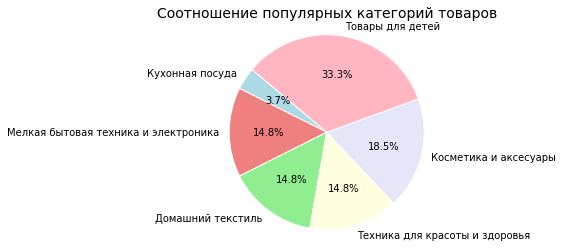

In [205]:
# Визуализация
labels = ['Кухонная посуда' , 'Мелкая бытовая техника и электроника', 
         'Домашний текстиль', 'Техника для красоты и здоровья', 'Косметика и аксесуары',
         'Товары для детей']
sizes = [subscription_counts[5], subscription_counts[4], subscription_counts[3],
         subscription_counts[2], subscription_counts[1], subscription_counts[0]]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lavender', 'lightpink']

# График 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Соотношение популярных категорий товаров')
plt.show()

Рекомендуется расширить ассортимент товаров в категории - Товары для детей. Провести маркетологисечкую работу направленную на оповещение клиентов о появлении новых товаров в ней. Разработать маркетологические и рекламные предложения направленные на привлечение новых клиентов ориентированных на эту категорию товаров.

### Общий вывод


1. В рамках проекта была выполнена задача - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
2. Исходные данные предоставленные заказчиком: 
 - Файл market_file.csv в табличной форме содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
 - Файл market_money.csv - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
 - Файл market_time.csv - в табличном виде ссобраны данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
 - Файл money.csv - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
3. После загрузки данные были проверенны на явные и не явные дубликаты и пропуски. Всё выше перечисленное отсуствовало.
4. Для поиска лучшей модели был создан пайплайн с целью автоматизации её подбора.
5. Лучшей моделью была LogisticRegression(random_state=42).
6. Сегмент клиентов с прибыльность более 6 является наиболее перспективным, так как приносит самую высокую прибыль и имеет потенциал к численному росту. Поведение в целом такое-же как и у остальных клиентов, но есть потенциал в росте стоимости покупки и расширении ассортимента магазина в сторону дорогостоящих товаров. Рекомендуется расширить ассортимент товаров в категории - Товары для детей, для этого сегмента. Провести маркетологисечкую работу направленную на оповещение клиентов о появлении новых товаров в ней. 

Рекомендуется создать привликательные дополнительные предложения о товарах ориентированных на замужних женщин с детьми, а так же улучшить для этой категории клиентов предложения в типе сервиса премиум, с целью перехода на этот тип. Создать интересные для этой целевой аудитории предложения к Новому году, 23 февраля и началу сезона отдыха. Эти предложения должны повысить выручку в декабре, январе и мае. А так же добавить метрику по отслеживанию пола клиента, если это возжожно. Как правило женщины больше времени проводят за покупками. Эта метрика могла бы потвердить или опровергнуть гипотезу о женской целевой аудитории перспективного сегмента, что в свою очередь поможет отделу маркетинга усовершенствовать свои предложения для клиентов.